# Introduction
- The purpose of this kernel is help students decide if they should apply to a master's degree or not based on features:
    - GRE Scores
    - TOEFL Scores
    - University Rating
    - Statement of Purpose
    - Letter or Recommendation Strength
    - CGPA
    - Research Experience
    - Chance of Admit

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Admission_Predict_Ver1.1.csv')
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data = raw_data.copy()

In [4]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.drop(['Serial_No.'],axis=1) #Serial No. is just an index. We can drop it
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


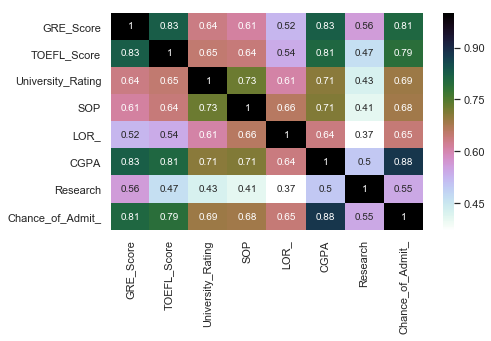

In [5]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(data.corr())
plt.show()

### From above
- GRE/TOEFL, GRE/CGPA are correlated
- CGPA/TOEFL, CGPA/Chance_of_Admit_ are correlated
- SOP/LOR/Research/University Rating have very limited corelation with other variable
- Most important variable sare GRE/TOEFL/CGPA

In [6]:
y = data['Chance_of_Admit_']
x1 = data['CGPA']

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

c:\users\simos\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          3.40e-165
Time:                        13:52:49   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0443      0.042    -24.689      0.000      -1.127      -0.961
CGPA           0.2059      0.005     41.855      0.000       0.196       0.216
==============================================================================
Omnibus:                       77.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.520
Skew:                          -0.898   Prob(JB):                     6.84e-32
Kurtosis:                       4.915   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x2 = data[['CGPA','TOEFL_Score']]

In [9]:
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     969.2
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          3.04e-172
Time:                        13:52:49   Log-Likelihood:                 667.35
No. Observations:                 500   AIC:                            -1329.
Df Residuals:                     497   BIC:                            -1316.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2385      0.050    -24.529      0.000      -1.338      -1.139
CGPA            0.1635      0.008     20.245      0.000       0.148       0.179
TOEFL_Score     0.0052      0.001      6.486      0.000       0.004       0.007
==============================================================================
Omnibus:                      101.033   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.164
Skew:                          -1.096   Prob(JB):                     1.04e-45
Kurtosis:                       5.266   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Note that the adj R^2 increasesd, meaning TOEFL did not penalize us

In [10]:
x3 = data[['CGPA','TOEFL_Score','GRE_Score']]

In [11]:
x = sm.add_constant(x3)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     680.9
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          2.21e-175
Time:                        13:52:49   Log-Likelihood:                 678.23
No. Observations:                 500   AIC:                            -1348.
Df Residuals:                     496   BIC:                            -1332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5968      0.091    -17.566      0.000      -1.775      -1.418
CGPA            0.1436      0.009     16.003      0.000       0.126       0.161
TOEFL_Score     0.0032      0.001      3.573      0.000       0.001       0.005
GRE_Score       0.0024      0.001      4.697      0.000       0.001       0.003
==============================================================================
Omnibus:                      116.684   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.918
Skew:                          -1.185   Prob(JB):                     1.65e-61
Kurtosis:                       5.796   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Note that the adj R^2 increasesd, meaning GRE did not penalize us

In [12]:
x4 = data[['CGPA','TOEFL_Score','GRE_Score','SOP','LOR_','University_Rating','Research']]

In [13]:
x = sm.add_constant(x4)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          8.21e-180
Time:                        13:52:49   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
TOEFL_Score           0.0028      0.001      3.184      0.002       0.001       0.004
GRE_Score             0.0019      0.001      3.700      0.000       0.001       0.003
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR_                  0.0169      0.004      4.074      0.000       0.009       0.025
University_Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Individually adding each element causes an increase in the adj R^2. No variables penalize => variables have explanatory power
- However, the P values must be less than 0.05. So we can remove SOP and University Rating

In [14]:
x1 = data[['CGPA','TOEFL_Score','GRE_Score','LOR_','Research']]

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          9.97e-182
Time:                        13:52:49   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3357      0.099    -13.482      0.000      -1.530      -1.141
CGPA            0.1230      0.009     13.221      0.000       0.105       0.141
TOEFL_Score     0.0030      0.001      3.501      0.001       0.001       0.005
GRE_Score       0.0019      0.001      3.760      0.000       0.001       0.003
LOR_            0.0193      0.004      5.092      0.000       0.012       0.027
Research        0.0252      0.007      3.814      0.000       0.012       0.038
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

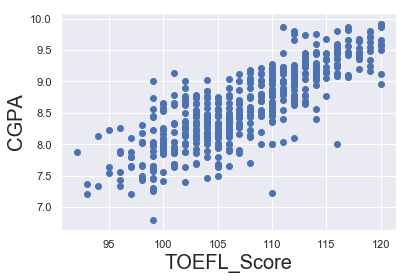

In [16]:
# Create a scatter plot of x1 (CGPA, no constant) and y (Chance of Admit)
plt.scatter(x4['TOEFL_Score'],x4['CGPA'],color = 'C0')
plt.xlabel('TOEFL_Score', fontsize = 20)
plt.ylabel('CGPA', fontsize = 20)
plt.show()

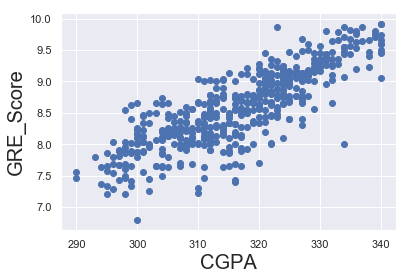

In [17]:
plt.scatter(x1['GRE_Score'],x1['CGPA'],color = 'C0')
plt.xlabel('CGPA', fontsize = 20)
plt.ylabel('GRE_Score', fontsize = 20)
plt.show()

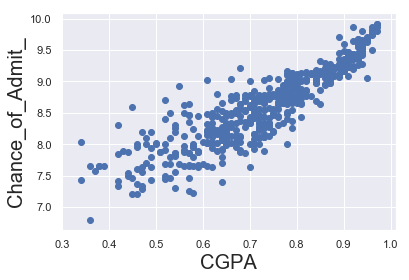

In [18]:
plt.scatter(y,x1['CGPA'],color = 'C0')
plt.xlabel('CGPA', fontsize = 20)
plt.ylabel('Chance_of_Admit_', fontsize = 20)
plt.show()

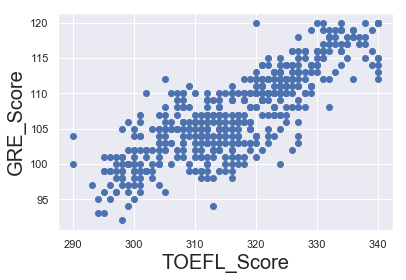

In [19]:
plt.scatter(x1['GRE_Score'],x1['TOEFL_Score'],color = 'C0')
plt.xlabel('TOEFL_Score', fontsize = 20)
plt.ylabel('GRE_Score', fontsize = 20)
plt.show()

In [20]:
#Check for null data
data.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR_                 0
CGPA                 0
Research             0
Chance_of_Admit_     0
dtype: int64

### No null values

# CHECK OLS ASSUMPTIONS

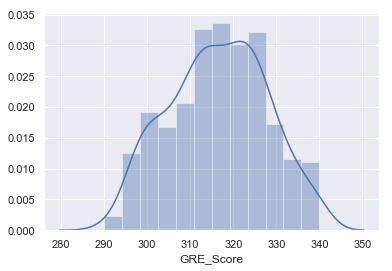

In [21]:
sns.distplot(data['GRE_Score'])

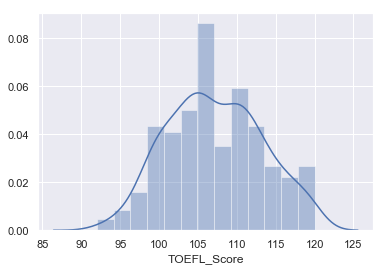

In [22]:
sns.distplot(data['TOEFL_Score'])

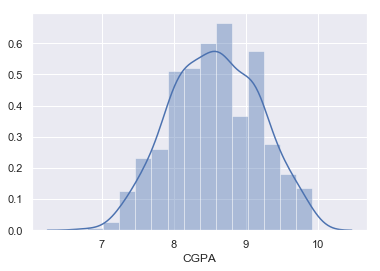

In [23]:
sns.distplot(data['CGPA'])

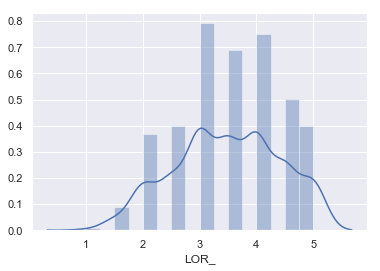

In [37]:
sns.distplot(data['LOR_'])

# Declare inputs and targets

In [25]:
# The target(s) (dependent variable) is 'data'
targets = data['Chance_of_Admit_']
inputs = data[['CGPA','TOEFL_Score','GRE_Score','LOR_','Research']]

# Scale the data

In [26]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [28]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [29]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

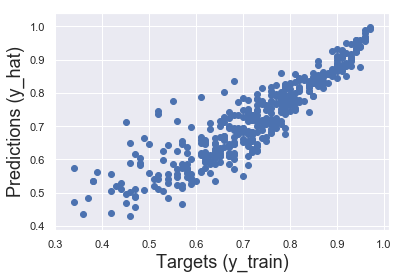

In [31]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

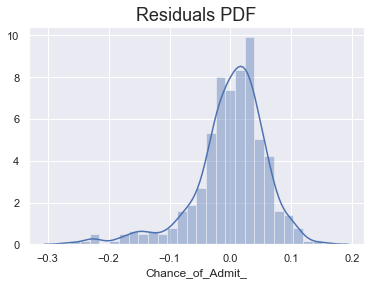

In [32]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [33]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.8189743923581327

In [34]:
# Obtain the bias (intercept) of the regression
reg.intercept_

0.7237063353931281

In [35]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([0.07603649, 0.01658588, 0.01813887, 0.01816442, 0.01537116])

In [36]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,CGPA,0.076036
1,TOEFL_Score,0.016586
2,GRE_Score,0.018139
3,LOR_,0.018164
4,Research,0.015371


### By looking at the weights, we can see the CGPA is obviously the best indicator, followed by LOR, GRE, and then TOEFL